$$  \begin{align*}
        \mathrm{DMG_{out}} = \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right]
                             \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{_{\%}}} \times \mathrm{DMG_{crit}^{_{\%}}} \right) \\
    \end{align*} $$

- Fixed stats:
    - $\small \mathrm{ER^{_{\%}}}$
    - $\small \mathrm{ATK_{base}}$
    - $\small \mathrm{ATK_{flat}}$
    - $\small \mathrm{DMG_{bonus}^{_{\%}}}$
    
&nbsp;
- Optimized stats:
    - $\small \mathrm{ATK_{bonus}^{_{\%}}}$
    - $\small \mathrm{Rate_{crit}^{_{\%}}}$
    - $\small \mathrm{DMG_{crit}^{_{\%}}}$

&nbsp;
- 1 Score is worth either:
    - 5.25% of $\small \mathrm{ATK_{bonus}^{_{\%}}}$
    - 3.50% of $\small \mathrm{Rate_{crit}^{_{\%}}}$
    - 7.00% of $\small \mathrm{DMG_{crit}^{_{\%}}}$

$$  \begin{align*}
        \mathrm{Score} = \frac{\mathrm{ATK_{bonus}^{\%}}}{5.25\%} + \frac{\mathrm{Rate_{crit}^{\%}}}{3.50\%} + \frac{\mathrm{DMG_{crit}^{\%}}}{7.00\%} \\ \\
    \end{align*}$$

$$  \begin{cases}
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{ATK_{bonus}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{ATK_{bonus}^{_{\%}}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{Rate_{crit}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{Rate_{crit}^{_{\%}}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{crit}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{DMG_{crit}^{_{\%}}}}
    \end{cases}
    \implies
    \begin{cases}
        \mathrm{ATK_{base}} \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{_{\%}}} \times \mathrm{DMG_{crit}^{_{\%}}} \right) = \frac{\lambda}{5.25\%} \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \mathrm{DMG_{crit}^{_{\%}}} = \frac{\lambda}{3.50\%} \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \mathrm{Rate_{crit}^{_{\%}}} = \frac{\lambda}{7.00\%}
    \end{cases}
    \implies
    \begin{cases}
        \lambda' = 1 + \mathrm{ATK_{bonus}^{_{\%}}} + \frac{\mathrm{ATK_{flat}}}{\mathrm{ATK_{base}}} \\ \\
        \lambda' = \frac{3}{2} \left(\mathrm{Rate_{crit}^{_{\%}}} + \frac{1}{\mathrm{DMG_{crit}^{_{\%}}}} \right) \\ \\
        \lambda' = \frac{3}{4} \left(\mathrm{DMG_{crit}^{_{\%}}} + \frac{1}{\mathrm{Rate_{crit}^{_{\%}}}} \right)
    \end{cases} $$

#### Build WF5-ER-DMG-CRIT — Wavebreaker's Fin R5 with $\small \mathrm{ER^{_{\%}}}|\mathrm{DMG_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8\%$
    - 51.8% Sands of Eon
    - 20% 2p Emblem of Severed Fate
- $\mathrm{ATK_{base}} = 845$
    - 225 Xiangling
    - 620 Wavebreaker's Fin
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 221.15\%$
    - 46.6% Goblet of Eonothem
    - 69.6% Wavebreaker's Fin R5 (290 total energy)
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 65.05\%$
    - 13.8% Wavebreaker's Fin
    - 25% Pyro Resonance
    - 26.25% Initial substat slots (5 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 50.1\%$
    - 5% Xiangling
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

#### Build WF5-ER-ATK-CRIT — Wavebreaker's Fin R5 with $\small \mathrm{ER^{_{\%}}}|\mathrm{ATK_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8\%$
    - 51.8% Sands of Eon
    - 20% 2p Emblem of Severed Fate
- $\mathrm{ATK_{base}} = 845$
    - 225 Xiangling
    - 620 Wavebreaker's Fin
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 174.55\%$
    - 69.6% Wavebreaker's Fin R5 (290 total energy)
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 106.4\%$
    - 13.8% Wavebreaker's Fin
    - 25% Pyro Resonance
    - 46.6% ATK Goblet of Eonothem
    - 21% Initial substat slots (4 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 50.1\%$
    - 5% Xiangling
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

#### Build TC5-ATK-DMG-CRIT — "The Catch" R5 with $\small \mathrm{ATK_{bonus}^{_{\%}}}|\mathrm{DMG_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8%$
    - 45.9% "The Catch"
    - 20% 2p Emblem of Severed Fate
    - ~5.9% Substats
- $\mathrm{ATK_{base}} = 735$
    - 225 Xiangling
    - 510 Wavebreaker's Fin
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 183.55\%$
    - 46.6% Goblet of Eonothem
    - 32.0% "The Catch" R5
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 92.6\%$
    - 25% Pyro Resonance
    - 46.6% ATK Sands of Eon
    - 21% Initial substat slots (4 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 62.1\%$
    - 5% Xiangling
    - 12% "The Catch" R5
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

#### Build TC5-ATK-ATK-CRIT — "The Catch" R5 with $\small \mathrm{ATK_{bonus}^{_{\%}}}|\mathrm{ATK_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8%$
    - 45.9% "The Catch"
    - 20% 2p Emblem of Severed Fate
    - ~5.9% Substats
- $\mathrm{ATK_{base}} = 735$
    - 225 Xiangling
    - 510 Wavebreaker's Fin
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 136.95\%$
    - 32.0% "The Catch" R5
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 133.95\%$
    - 25% Pyro Resonance
    - 46.6% ATK Sands of Eon
    - 46.6% ATK Goblet of Eonothem
    - 15.75% Initial substat slots (3 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 62.1\%$
    - 5% Xiangling
    - 12% "The Catch" R5
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

#### Build DM5-ER-DMG-CRIT — Deathmatch R5 with $\small \mathrm{ER^{_{\%}}}|\mathrm{DMG_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8\%$
    - 51.8% Sands of Eon
    - 20% 2p Emblem of Severed Fate
- $\mathrm{ATK_{base}} = 679$
    - 225 Xiangling
    - 454 Deathmatch
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 151.55\%$
    - 46.6% Goblet of Eonothem
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 83.25\%$
    - 32% Deathmatch R5 (more than one opponent)
    - 25% Pyro Resonance
    - 26.25% Initial substat slots (5 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 86.9\%$
    - 5% Xiangling
    - 36.8% Deathmatch
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

#### Build DM5-ER-ATK-CRIT — Deathmatch R5 with $\small \mathrm{ER^{_{\%}}}|\mathrm{ATK_{bonus}^{_{\%}}}|\mathrm{Rate_{crit}^{_{\%}}}$:

- $\mathrm{ER^{_{\%}}} = 171.8\%$
    - 51.8% Sands of Eon
    - 20% 2p Emblem of Severed Fate
- $\mathrm{ATK_{base}} = 679$
    - 225 Xiangling
    - 454 Deathmatch
- $\mathrm{ATK_{flat}} = 1311$
    - ~1000 Bennett's Q
    - 311 Plume of Death
- $\mathrm{DMG_{bonus}^{_{\%}}} = 104.95\%$
    - 24% Raiden Shogun's E
    - 38% Kaedehara Kazuha's A4 (950 $\small \mathrm{EM}$)
    - 42.95% 4p Emblem of Severed Fate (171.8% $\small \mathrm{ER^{_{\%}}}$)
- Initial $\mathrm{ATK_{bonus}^{_{\%}}} = 124.6\%$
    - 32% Deathmatch R5 (more than one opponent)
    - 25% Pyro Resonance
    - 46.6% ATK Goblet of Eonothem
    - 21% Initial substat slots (4 × 5.25%)
- Initial $\mathrm{Rate_{crit}^{_{\%}}} = 86.9\%$
    - 5% Xiangling
    - 36.8% Deathmatch
    - 31.1% Circlet of Logos
    - 14% Initial substat slots (4 × 3.50%)
- Initial $\mathrm{DMG_{crit}^{_{\%}}} = 85\%$
    - 50% Xiangling
    - 35% Initial substat slots (5 × 7.00%)

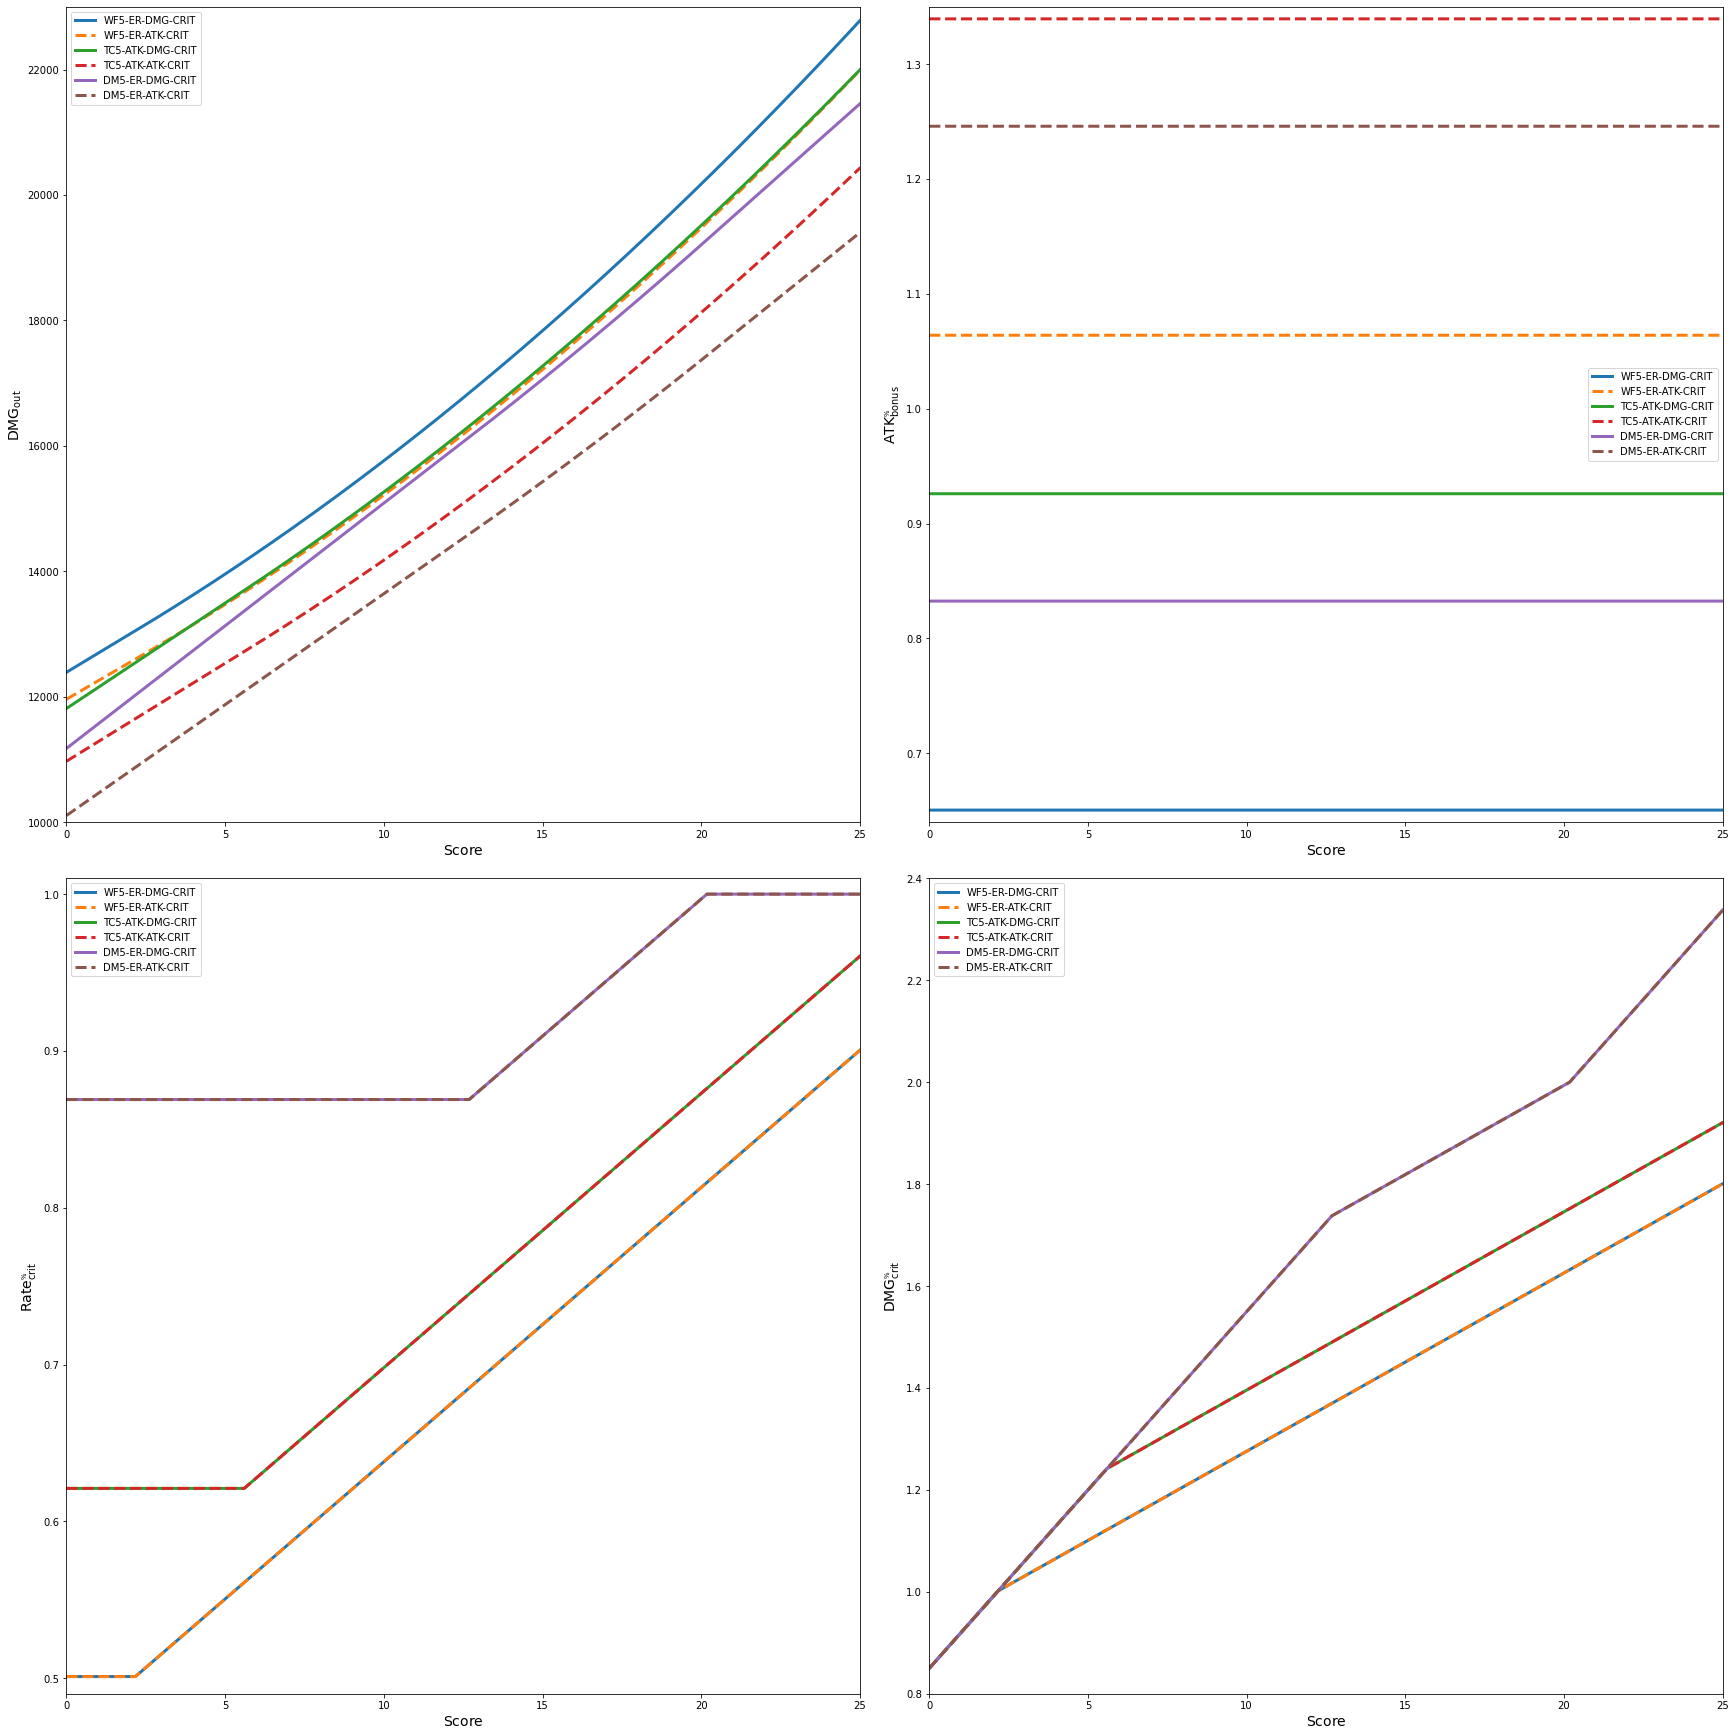

In [1]:
import numpy as np
from matplotlib import pyplot

def compute_stats(atk_base, atk_flat, dmg_bonus, initial_atk_bonus, initial_rate_crit, initial_dmg_crit):
    dmg_crit = np.linspace(initial_dmg_crit, 10.0, 10000)
    rate_crit = np.maximum(np.minimum(dmg_crit/2, 1.0), initial_rate_crit)
    atk_bonus = np.maximum((3/4) * (dmg_crit + 1/rate_crit) - 1 - (atk_flat / atk_base), initial_atk_bonus)
    dmg_out = (atk_base * (1 + atk_bonus) + atk_flat) * (1 + dmg_bonus) * (1 + rate_crit * dmg_crit)
    score_modifier = ((initial_atk_bonus / 5.25) + (initial_rate_crit / 3.50) + (initial_dmg_crit / 7.00)) * 100
    score = ((atk_bonus / 5.25) + (rate_crit / 3.50) + (dmg_crit / 7.00)) * 100 - score_modifier
    return (atk_bonus, rate_crit, dmg_crit, dmg_out, score)

def plot(axs, label, linestyle, atk_bonus, rate_crit, dmg_crit, dmg_out, score):
    axs[0, 0].plot(score, dmg_out, linestyle=linestyle, linewidth=3, label=label)
    axs[0, 1].plot(score, atk_bonus, linestyle=linestyle, linewidth=3, label=label)
    axs[1, 0].plot(score, rate_crit, linestyle=linestyle, linewidth=3, label=label)
    axs[1, 1].plot(score, dmg_crit, linestyle=linestyle, linewidth=3, label=label)

fig, axs = pyplot.subplots(2, 2, constrained_layout=True, figsize=(24, 24))
axs[0, 0].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[0, 0].set_ylabel(r'$\mathrm{DMG_{out}}$', fontsize=14)
axs[0, 0].set_xlim(0, 25)
axs[0, 0].set_ylim(10000, 23000)
axs[0, 1].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[0, 1].set_ylabel(r'$\mathrm{ATK_{bonus}^{_{\%}}}$', fontsize=14)
axs[0, 1].set_xlim(0, 25)
axs[0, 1].set_ylim(0.64, 1.35)
axs[1, 0].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[1, 0].set_ylabel(r'$\mathrm{Rate_{crit}^{_{\%}}}$', fontsize=14)
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0.49, 1.01)
axs[1, 1].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[1, 1].set_ylabel(r'$\mathrm{DMG_{crit}^{_{\%}}}$', fontsize=14)
axs[1, 1].set_xlim(0, 25)
axs[1, 1].set_ylim(0.8, 2.4)

WF5_ER_DMG_CRIT = compute_stats(845, 1311, 221.15/100, 65.05/100, 50.1/100, 85/100)
WF5_ER_ATK_CRIT = compute_stats(845, 1311, 174.55/100, 106.4/100, 50.1/100, 85/100)
TC5_ATK_DMG_CRIT = compute_stats(735, 1311, 183.55/100, 92.6/100, 62.1/100, 85/100)
TC5_ATK_ATK_CRIT = compute_stats(735, 1311, 136.95/100, 133.95/100, 62.1/100, 85/100)
DM5_ER_DMG_CRIT = compute_stats(679, 1311, 151.55/100, 83.25/100, 86.9/100, 85/100)
DM5_ER_ATK_CRIT = compute_stats(679, 1311, 104.95/100, 124.6/100, 86.9/100, 85/100)

plot(axs, 'WF5-ER-DMG-CRIT', 'solid', *WF5_ER_DMG_CRIT)
plot(axs, 'WF5-ER-ATK-CRIT', 'dashed', *WF5_ER_ATK_CRIT)
plot(axs, 'TC5-ATK-DMG-CRIT', 'solid', *TC5_ATK_DMG_CRIT)
plot(axs, 'TC5-ATK-ATK-CRIT', 'dashed', *TC5_ATK_ATK_CRIT)
plot(axs, 'DM5-ER-DMG-CRIT', 'solid', *DM5_ER_DMG_CRIT)
plot(axs, 'DM5-ER-ATK-CRIT', 'dashed', *DM5_ER_ATK_CRIT)

for ax in axs.flat:
    ax.legend()